In [7]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [73]:
# Question 1 - Extracting Tesla Stock Data Using yfinance
import yfinance as yf

tesla_data = yf.download("TSLA", start="2022-01-01", end="2022-12-31")
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
2022-01-04 00:00:00-05:00,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2022-01-05 00:00:00-05:00,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
2022-01-06 00:00:00-05:00,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
2022-01-07 00:00:00-05:00,360.123322,360.309998,336.666656,342.320007,342.320007,84164700


In [88]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping
import pandas as pd
import requests
from bs4 import BeautifulSoup

data  = requests.get("https://www.cnbc.com/quotes/TSLA?qsearchterm=TSLA").text
soup = BeautifulSoup(data, 'html5lib')

tesla_df = pd.DataFrame(columns=["Attribute", "Value"])

for row in soup.find('ul', class_='Summary-ratios').find_all('li', class_='Summary-stat'):
    col = row.find_all('span')
    attribute = col[0].text
    value = col[1].text
    tesla_df = tesla_df.append({"Attribute":attribute, "Value":value}, ignore_index=True)   

print('Revenue: ' + tesla_df.iloc[5,1])

Revenue: 86.035B


In [41]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
import yfinance as yf

gme_data = yf.download("GME", start="2022-01-01", end="2022-12-31")
gme_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,37.307499,39.845001,37.302502,38.209999,38.209999,5654800
2022-01-04 00:00:00-05:00,38.042500,38.247501,35.762501,37.227501,37.227501,7339600
2022-01-05 00:00:00-05:00,37.097500,37.212502,32.287498,32.342499,32.342499,13585600
2022-01-06 00:00:00-05:00,33.209999,34.424999,30.285000,32.757500,32.757500,24206000
2022-01-07 00:00:00-05:00,39.942501,40.077499,33.125000,35.154999,35.154999,48549200


In [91]:
# Question 4 - Extracting GameStop Revenue Data Using Webscraping
import pandas as pd
import requests
from bs4 import BeautifulSoup

data  = requests.get("https://www.cnbc.com/quotes/GME?qsearchterm=GME").text
soup = BeautifulSoup(data, 'html5lib')

gme_df = pd.DataFrame(columns=["Attribute", "Value"])

for row in soup.find('ul', class_='Summary-ratios').find_all('li', class_='Summary-stat'):
    col = row.find_all('span')
    attribute = col[0].text
    value = col[1].text
    gme_df = gme_df.append({"Attribute":attribute, "Value":value}, ignore_index=True)   

print('Revenue: ' + gme_df.iloc[5,1])

Revenue: 5.927B


Revenue: 86.035B


<AxesSubplot:xlabel='Date'>

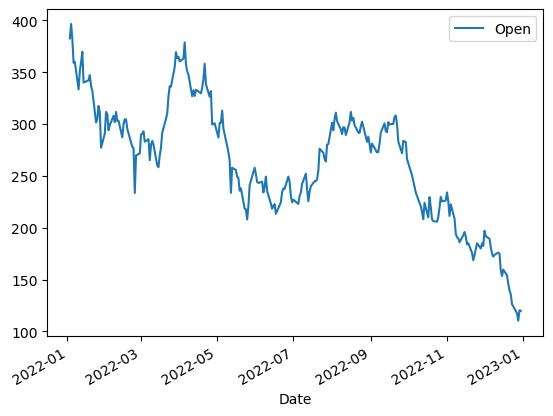

In [87]:
# Question 5 - Tesla Stock and Revenue Dashboard
print('Revenue: ' + tesla_df.iloc[5,1])
tesla_data.reset_index(inplace=True)
tesla_data.plot(x="Date", y="Open")


Revenue: 5.927B


<AxesSubplot:xlabel='Date'>

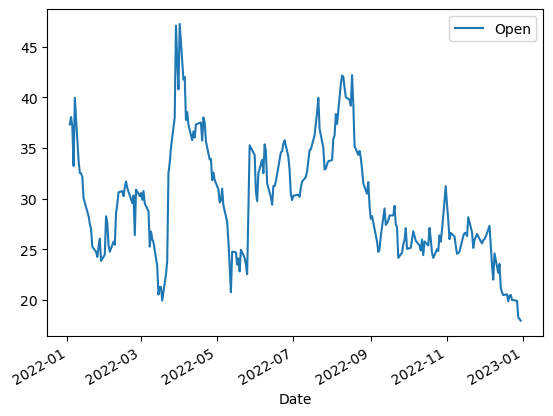

In [92]:
# Question 6 - GameStop Stock and Revenue Dashboard
print('Revenue: ' + gme_df.iloc[5,1])
gme_data.reset_index(inplace=True)
gme_data.plot(x="Date", y="Open")